In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore') # Ignores any eventual warnings in the notebook

In [2]:
# Read CSV file
data = pd.read_csv('ProducedDatasets/PhageAcr_ML_dataset_cdhit.csv')
data.set_index('ID', inplace=True)                          # Set the "ID" column as the index

In [3]:
# Check information regarding dataset
print(data.isna().sum())        # Check if any of the columns have missing values
print(data.info())              # Check column types
data.describe(include='all')    # Check statistics

Protein_Acr                              0
length                                   0
charge                                   0
chargedensity                            0
formulaC                                 0
formulaH                                 0
formulaN                                 0
formulaO                                 0
formulaS                                 0
tot                                      0
hydrogen                                 0
single                                   0
double                                   0
MW_modlamp                               0
Gravy                                    0
Aromacity                                0
IsoelectricPoint                         0
Instability_index                        0
SecStruct_helix                          0
SecStruct_turn                           0
SecStruct_sheet                          0
Molar_extinction_coefficient_reduced     0
Molar_extinction_coefficient_oxidized    0
aliphatic_i

,Protein_Acr,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
count,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.00000,2244.000000,2244.000000,2244.000000,...,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000
mean,0.500000,248.285651,-6.695414,-0.000281,1207.989305,1879.772282,322.16533,385.962567,7.806150,4397.420677,...,5.690712,35.810279,0.332967,0.280577,0.357714,33603.582888,33688.865865,82.435960,1.658216,0.369782
std,0.500111,208.636828,8.781504,0.000395,986.690577,1540.050501,268.71012,322.866032,5.473915,3609.558541,...,1.466920,11.360295,0.046547,0.041249,0.041236,30149.425986,30194.601234,11.294466,0.494860,0.038141
min,0.000000,47.000000,-74.624000,-0.001981,235.000000,360.000000,58.00000,71.000000,1.000000,845.000000,...,4.050028,-2.384375,0.165385,0.116883,0.206207,0.000000,0.000000,37.142857,-0.806250,0.216710
25%,0.000000,104.750000,-10.024000,-0.000429,525.750000,830.750000,137.00000,165.000000,4.000000,1915.750000,...,4.767990,28.275842,0.303671,0.255749,0.329985,14325.000000,14440.000000,75.079858,1.318027,0.344812
50%,0.500000,153.000000,-5.097500,-0.000233,761.500000,1171.000000,199.00000,245.000000,6.000000,2743.000000,...,5.199029,35.359914,0.333333,0.283019,0.354558,24980.000000,24980.000000,82.417967,1.645809,0.368421
75%,1.000000,390.000000,-1.700750,-0.000079,1878.250000,2960.250000,505.25000,602.250000,10.000000,6880.000000,...,6.024686,42.808464,0.360825,0.307049,0.383035,44920.000000,45060.000000,89.369103,1.992966,0.392523
max,1.000000,3601.000000,56.510000,0.001504,17275.000000,26813.000000,4587.00000,5679.000000,65.000000,62879.000000,...,11.800051,83.681429,0.506494,0.546816,0.528846,601510.000000,602635.000000,142.403846,4.079714,0.622120


In [4]:
X = data.drop('Protein_Acr', axis=1) 
y = data['Protein_Acr'].values

# Split the dataset into training+validation (80%) and test sets (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # random_state will allow for the reproductibility of the split

# Split the training+validation set into training (70%) and validation sets (10% of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Checking the shape of the resulting sets
print(f'Training Set \t Shape of X_train: {X_train.shape} \n\t\t Shape of y_train: {y_train.shape} \n')
print(f'Validation Set \t Shape of X_val: {X_val.shape} \n\t\t Shape of y_val: {y_val.shape} \n')
print(f'Test Set \t Shape of X_test: {X_test.shape} \n\t\t Shape of y_test: {y_test.shape}')

# Selecting scoring metrics (there are more available)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1'] 

Training Set 	 Shape of X_train: (1570, 25) 
		 Shape of y_train: (1570,) 

Validation Set 	 Shape of X_val: (225, 25) 
		 Shape of y_val: (225,) 

Test Set 	 Shape of X_test: (449, 25) 
		 Shape of y_test: (449,)


# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=42)
print(estimator)

selector = SelectKBest(f_classif)
selector.fit(X, y)
X_new = selector.transform(X)

print(X.shape)
print(X_new.shape)

# Check what were the selected features:
selected_features = X.iloc[:, selector.get_support(indices=True)].columns.tolist()
print('Selected Features: %s' % selected_features)

DecisionTreeClassifier(random_state=42)
(2244, 25)
(2244, 10)
Selected Features: ['length', 'formulaC', 'formulaH', 'formulaN', 'formulaO', 'tot', 'hydrogen', 'single', 'double', 'MW_modlamp']


In [6]:
## Pipeline
# Define the pipeline
pipeline = Pipeline([('selector', selector), 
                     ('scaler', StandardScaler()), 
                     ('dt', estimator)])

# Define the parameters to test
params_to_test = {'selector__k': [30, 25, 20, 15, 10, 5],
                  'dt__max_depth': [None, 5, 10, 20],  
                  'dt__min_samples_split': [2, 5, 10]} 

grid_search = GridSearchCV(pipeline, params_to_test, cv=3)  # Hyperparameter Optimization
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

gs_results = pd.DataFrame.from_dict(data=grid_search.cv_results_)
gs_results

Best parameters: {'dt__max_depth': 5, 'dt__min_samples_split': 5, 'selector__k': 20}
Best score: 0.8840670140459962


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__max_depth,param_dt__min_samples_split,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052745,0.007584,0.005542,0.001346,None,2,30,"{'dt__max_depth': None, 'dt__min_samples_split...",0.870229,0.847036,0.864245,0.860503,0.009831,23
1,0.050069,0.005232,0.003427,0.000264,None,2,25,"{'dt__max_depth': None, 'dt__min_samples_split...",0.870229,0.847036,0.864245,0.860503,0.009831,23
2,0.038682,0.007155,0.004418,0.000435,None,2,20,"{'dt__max_depth': None, 'dt__min_samples_split...",0.877863,0.868069,0.871893,0.872608,0.004030,4
3,0.031786,0.003950,0.004507,0.000729,None,2,15,"{'dt__max_depth': None, 'dt__min_samples_split...",0.854962,0.862333,0.824092,0.847129,0.016565,55
4,0.022653,0.001889,0.003984,0.000032,None,2,10,"{'dt__max_depth': None, 'dt__min_samples_split...",0.870229,0.845124,0.843212,0.852855,0.012310,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.043811,0.004593,0.003473,0.000631,20,10,25,"{'dt__max_depth': 20, 'dt__min_samples_split':...",0.870229,0.831740,0.847036,0.849668,0.015823,48
68,0.037621,0.003806,0.003656,0.000555,20,10,20,"{'dt__max_depth': 20, 'dt__min_samples_split':...",0.879771,0.852772,0.869981,0.867508,0.011160,13
69,0.026715,0.003081,0.003659,0.000099,20,10,15,"{'dt__max_depth': 20, 'dt__min_samples_split':...",0.858779,0.850860,0.822180,0.843940,0.015722,60
70,0.021157,0.000674,0.003680,0.000889,20,10,10,"{'dt__max_depth': 20, 'dt__min_samples_split':...",0.868321,0.839388,0.839388,0.849032,0.013639,52


In [7]:
best_params_dt = grid_search.best_params_       # Define best parameters
best_pipeline_dt = grid_search.best_estimator_
best_pipeline_dt

Pipeline(steps=[('selector', SelectKBest(k=20)), ('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=5,
                                        random_state=42))])

In [8]:
# Divide train dataset into 5 folds (cv=5). For each iteration, 1 fold will be used as validation set, remaining 4 folds will be used to train the model
cv_scores = cross_validate(best_pipeline_dt, X_train, y_train, scoring=scoring_metrics, cv=5, return_train_score=False)

for key, value in cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metric: %s" % key)
        print("Results of each fold: %s" % value)               # Results of each fold
        print("Mean of all folds: %s" % np.mean(value))
        print("Standard Deviation: %s" % np.std(value), "\n")
    
# Recommended to save model evaluation results in files!

Metric: test_accuracy
Results of each fold: [0.89808917 0.89808917 0.86305732 0.9044586  0.82484076]
Mean of all folds: 0.8777070063694268
Standard Deviation: 0.030185976079166326 

Metric: test_precision
Results of each fold: [0.86516854 0.86931818 0.86956522 0.9068323  0.78804348]
Mean of all folds: 0.8597855429865688
Standard Deviation: 0.03892508421417478 

Metric: test_recall
Results of each fold: [0.95061728 0.94444444 0.86419753 0.9068323  0.90062112]
Mean of all folds: 0.9133425350816655
Standard Deviation: 0.03154737626528968 

Metric: test_f1
Results of each fold: [0.90588235 0.90532544 0.86687307 0.9068323  0.84057971]
Mean of all folds: 0.8850985740050424
Standard Deviation: 0.02693527393584241 



In [9]:
# Train the model on the complete dataset:
model_dt = best_pipeline_dt.fit(X_train, y_train)

y_test_pred_dt = model_dt.predict(X_test)

matrix = confusion_matrix(y_test, y_test_pred_dt)
matrix

array([[189,  35],
       [ 20, 205]], dtype=int64)

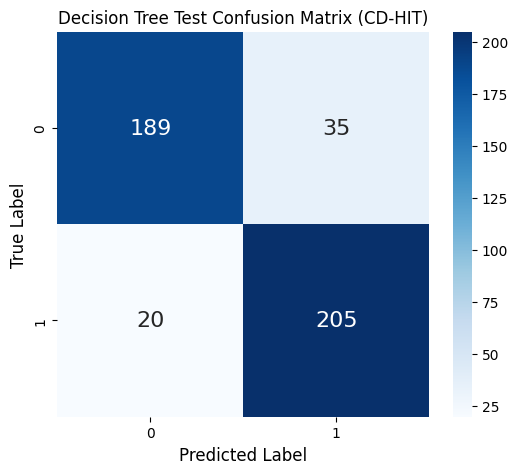

In [10]:
## Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred_dt)

# Plot the confusion matrix for the test set
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Decision Tree Test Confusion Matrix (CD-HIT)')
plt.show()

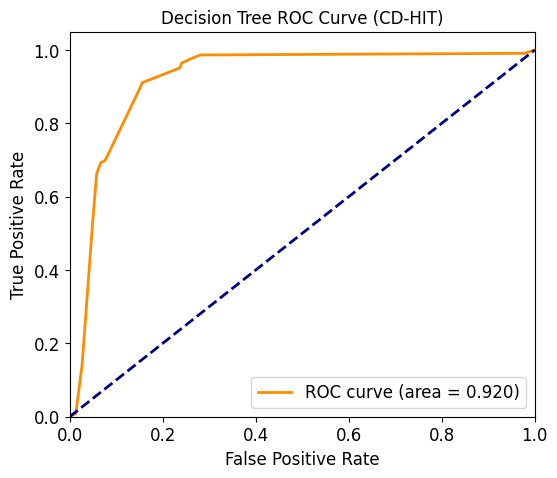

In [11]:
## ROC Curve and AUC
# Calculate predicted probabilities for the test set
y_test_pred_prob = model_dt.predict_proba(X_test)[:, 1]                         # Calculate the predicted probabilities for the test set
test_fpr_dt, test_tpr_dt, thresholds = roc_curve(y_test, y_test_pred_prob)      # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the test set
test_roc_auc_dt = auc(test_fpr_dt, test_tpr_dt)                                 # Calculate the area under the ROC curve (AUC) for the test set

# Plot the ROC curve for the test set
plt.figure(figsize=(6, 5))
plt.plot(test_fpr_dt, test_tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Decision Tree ROC Curve (CD-HIT)')
plt.legend(loc='lower right', fontsize=12)                  # Increase font size of legend
plt.tick_params(axis='both', which='major', labelsize=12)   # Increase font size of axis numbers
plt.show()

In [12]:
## Metrics
accuracy = accuracy_score(y_test, y_test_pred_dt)                   # Accuracy
precision = precision_score(y_test, y_test_pred_dt)                 # Precision
recall = recall_score(y_test, y_test_pred_dt)                       # Recall / Sensitivity
f1 = f1_score(y_test, y_test_pred_dt)                               # F1-Score

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_dt).ravel()   # Obtain true positives, false positives, false negatives and true positives from confusion matrix
specificity = tn / (tn + fp)                                        # Specificity

print("Decision Tree Test Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")

# Create a DataFrame
metrics_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Decision Tree': [accuracy, precision, recall, specificity, f1]
}).round(2)

Decision Tree Test Results:
Accuracy: 0.88
Precision: 0.85
Recall: 0.91
Specificity: 0.84
F1-Score: 0.88


### Validation Set

In [13]:
# Predict on the validation set
y_val_pred_dt = best_pipeline_dt.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

print(f"Validation Set Accuracy: {val_accuracy_dt:.2f}")

Validation Set Accuracy: 0.84


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state=42)
print(estimator)

selector = SelectKBest(f_classif)
selector.fit(X, y)
X_new = selector.transform(X)

print(X.shape)
print(X_new.shape)

# Check what were the selected features:
selected_features = X.iloc[:, selector.get_support(indices=True)].columns.tolist()
print('Selected Features: %s' % selected_features)

RandomForestClassifier(random_state=42)
(2244, 25)
(2244, 10)
Selected Features: ['length', 'formulaC', 'formulaH', 'formulaN', 'formulaO', 'tot', 'hydrogen', 'single', 'double', 'MW_modlamp']


In [15]:
## Pipeline
# Define the pipeline
pipeline = Pipeline([('selector', selector), 
                     ('scaler', StandardScaler()), 
                     ('rf', estimator)])

# Define the parameters to test
params_to_test = {'selector__k': [30, 25, 20, 15, 10, 5],
                  'rf__n_estimators': [50, 100, 150],  
                  'rf__max_depth': [None, 5, 10, 20],   
                  'rf__min_samples_split': [2, 5, 10]} 

grid_search = GridSearchCV(pipeline, params_to_test, cv=3)  # Hyperparameter Optimization
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

gs_results = pd.DataFrame.from_dict(data=grid_search.cv_results_)
gs_results

Best parameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 150, 'selector__k': 30}
Best score: 0.9070091320868546


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_split,param_rf__n_estimators,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.352230,0.019267,0.013220,0.001307,None,2,50,30,"{'rf__max_depth': None, 'rf__min_samples_split...",0.902672,0.896750,0.910134,0.903185,0.005476,19
1,0.371438,0.050902,0.013452,0.004306,None,2,50,25,"{'rf__max_depth': None, 'rf__min_samples_split...",0.902672,0.896750,0.910134,0.903185,0.005476,19
2,0.301540,0.016757,0.012268,0.001861,None,2,50,20,"{'rf__max_depth': None, 'rf__min_samples_split...",0.914122,0.887189,0.917782,0.906364,0.013641,9
3,0.266603,0.002989,0.012639,0.004459,None,2,50,15,"{'rf__max_depth': None, 'rf__min_samples_split...",0.896947,0.887189,0.887189,0.890442,0.004600,92
4,0.257954,0.028592,0.009953,0.000729,None,2,50,10,"{'rf__max_depth': None, 'rf__min_samples_split...",0.891221,0.862333,0.894837,0.882797,0.014546,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.999951,0.071171,0.021517,0.001710,20,10,150,25,"{'rf__max_depth': 20, 'rf__min_samples_split':...",0.904580,0.894837,0.904398,0.901272,0.004550,39
212,0.856239,0.027591,0.021157,0.000816,20,10,150,20,"{'rf__max_depth': 20, 'rf__min_samples_split':...",0.902672,0.889101,0.910134,0.900636,0.008706,47
213,0.720157,0.036193,0.021625,0.001953,20,10,150,15,"{'rf__max_depth': 20, 'rf__min_samples_split':...",0.902672,0.873805,0.879541,0.885339,0.012478,104
214,0.703482,0.011097,0.022793,0.000687,20,10,150,10,"{'rf__max_depth': 20, 'rf__min_samples_split':...",0.885496,0.860421,0.889101,0.878339,0.012756,140


In [16]:
best_params_rf = grid_search.best_params_  # Define best parameters
best_pipeline_rf = grid_search.best_estimator_
best_pipeline_rf

Pipeline(steps=[('selector', SelectKBest(k=30)), ('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(n_estimators=150, random_state=42))])

In [17]:
# Divide train dataset into 5 folds (cv=5). For each iteration, 1 fold will be used as validation set, remaining 4 folds will be used to train the model
cv_scores = cross_validate(best_pipeline_rf, X_train, y_train, scoring=scoring_metrics, cv=5, return_train_score=False)

for key, value in cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Métrica: %s" % key)
        print("Resultados de cada fold: %s" % value)            # Results of each fold
        print("Média de todas as folds: %s" % np.mean(value))
        print("Desvio padrão: %s" % np.std(value), "\n")
    
# Recommended to save model evaluation results in files!

Métrica: test_accuracy
Resultados de cada fold: [0.92675159 0.92675159 0.89808917 0.93630573 0.9044586 ]
Média de todas as folds: 0.9184713375796179
Desvio padrão: 0.014608082727617468 

Métrica: test_precision
Resultados de cada fold: [0.9017341  0.88826816 0.86111111 0.9122807  0.86187845]
Média de todas as folds: 0.885054505274999
Desvio padrão: 0.020689213928824012 

Métrica: test_recall
Resultados de cada fold: [0.96296296 0.98148148 0.95679012 0.9689441  0.9689441 ]
Média de todas as folds: 0.9678245533317998
Desvio padrão: 0.008178167970511692 

Métrica: test_f1
Resultados de cada fold: [0.93134328 0.93255132 0.90643275 0.93975904 0.9122807 ]
Média de todas as folds: 0.924473417933432
Desvio padrão: 0.012808011198440574 



In [18]:
# Train the model on the complete dataset:
model_rf = best_pipeline_rf.fit(X_train, y_train)

y_test_pred_rf = model_rf.predict(X_test)

matrix = confusion_matrix(y_test, y_test_pred_rf)
matrix

array([[201,  23],
       [  7, 218]], dtype=int64)

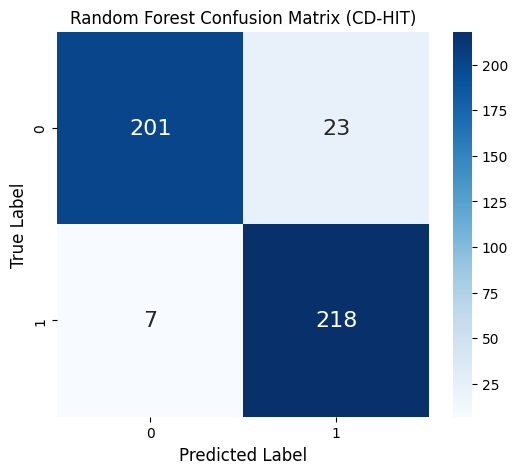

In [19]:
## Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred_rf)

# Plot the confusion matrix for the test set
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Random Forest Confusion Matrix (CD-HIT)')
plt.show()

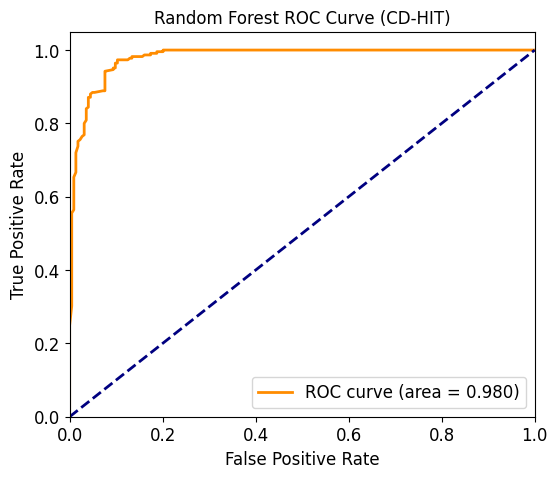

In [20]:
## ROC Curve and AUC
# Calculate predicted probabilities for the test set
y_test_pred_prob = model_rf.predict_proba(X_test)[:, 1]                         # Calculate the predicted probabilities for the test set
test_fpr_rf, test_tpr_rf, thresholds = roc_curve(y_test, y_test_pred_prob)      # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the test set
test_roc_auc_rf = auc(test_fpr_rf, test_tpr_rf)                                 # Calculate the area under the ROC curve (AUC) for the test set

# Plot the ROC curve for the test set
plt.figure(figsize=(6, 5))
plt.plot(test_fpr_rf, test_tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest ROC Curve (CD-HIT)')
plt.legend(loc='lower right', fontsize=12)                  # Increase font size of legend
plt.tick_params(axis='both', which='major', labelsize=12)   # Increase font size of axis numbers
plt.show()

In [21]:
## Metrics
accuracy = accuracy_score(y_test, y_test_pred_rf)                   # Accuracy
precision = precision_score(y_test, y_test_pred_rf)                 # Precision
recall = recall_score(y_test, y_test_pred_rf)                       # Recall / Sensitivity
f1 = f1_score(y_test, y_test_pred_rf)                               # F1-Score

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_rf).ravel()   # Obtain true positives, false positives, false negatives and true positives from confusion matrix
specificity = tn / (tn + fp)                                        # Specificity

print("Random Forest Test Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")

# Create a DataFrame
metrics_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Random Forest': [accuracy, precision, recall, specificity, f1]
}).round(2)

Random Forest Test Results:
Accuracy: 0.93
Precision: 0.90
Recall: 0.97
Specificity: 0.90
F1-Score: 0.94


### Validation Set

In [22]:
# Predict on the validation set
y_val_pred_rf = best_pipeline_rf.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

print(f"Validation Set Accuracy: {val_accuracy_rf:.2f}")

Validation Set Accuracy: 0.89


# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC

estimator = SVC(probability=True, random_state=42)
print(estimator)

selector = SelectKBest(f_classif)
selector.fit(X, y)
X_new = selector.transform(X)

print(X.shape)
print(X_new.shape)

# Check what were the selected features:
selected_features = X.iloc[:, selector.get_support(indices=True)].columns.tolist()
print('Atributos seleccionados: %s' % selected_features)

SVC(probability=True, random_state=42)
(2244, 25)
(2244, 10)
Atributos seleccionados: ['length', 'formulaC', 'formulaH', 'formulaN', 'formulaO', 'tot', 'hydrogen', 'single', 'double', 'MW_modlamp']


In [24]:
## Pipeline
# Define the pipeline
pipeline = Pipeline([('selector', selector), 
                     ('scaler', StandardScaler()), 
                     ('svm', estimator)])

# Define the parameters to test
params_to_test = {'selector__k': [30, 25, 20, 15, 10, 5],
                  'svm__C': [0.1, 1, 10],        
                  'svm__kernel': ['rbf']}

grid_search = GridSearchCV(pipeline, params_to_test, cv=3)  # Hyperparameter Optimization
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

gs_results = pd.DataFrame.from_dict(data=grid_search.cv_results_)
gs_results

Best parameters: {'selector__k': 30, 'svm__C': 10, 'svm__kernel': 'rbf'}
Best score: 0.9203764249120606


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_svm__C,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.295470,0.048042,0.054615,0.018026,30,0.1,rbf,"{'selector__k': 30, 'svm__C': 0.1, 'svm__kerne...",0.874046,0.854685,0.866157,0.864962,0.007949,10
1,0.251964,0.000455,0.041903,0.003817,30,1,rbf,"{'selector__k': 30, 'svm__C': 1, 'svm__kernel'...",0.914122,0.906310,0.906310,0.908914,0.003683,4
2,0.249534,0.019768,0.031991,0.004538,30,10,rbf,"{'selector__k': 30, 'svm__C': 10, 'svm__kernel...",0.929389,0.912046,0.919694,0.920376,0.007097,1
3,0.320304,0.001218,0.053222,0.005167,25,0.1,rbf,"{'selector__k': 25, 'svm__C': 0.1, 'svm__kerne...",0.874046,0.854685,0.866157,0.864962,0.007949,10
4,0.222940,0.021336,0.035839,0.002884,25,1,rbf,"{'selector__k': 25, 'svm__C': 1, 'svm__kernel'...",0.914122,0.906310,0.906310,0.908914,0.003683,4
5,0.232479,0.026483,0.027362,0.002973,25,10,rbf,"{'selector__k': 25, 'svm__C': 10, 'svm__kernel...",0.929389,0.912046,0.919694,0.920376,0.007097,1
6,0.239256,0.012249,0.040985,0.004473,20,0.1,rbf,"{'selector__k': 20, 'svm__C': 0.1, 'svm__kerne...",0.885496,0.864245,0.881453,0.877065,0.009214,7
7,0.191869,0.008880,0.034315,0.005408,20,1,rbf,"{'selector__k': 20, 'svm__C': 1, 'svm__kernel'...",0.906489,0.892925,0.896750,0.898721,0.005710,6
8,0.195521,0.012972,0.024919,0.003606,20,10,rbf,"{'selector__k': 20, 'svm__C': 10, 'svm__kernel...",0.919847,0.908222,0.904398,0.910822,0.006570,3
9,0.199991,0.008355,0.034697,0.001630,15,0.1,rbf,"{'selector__k': 15, 'svm__C': 0.1, 'svm__kerne...",0.879771,0.837476,0.869981,0.862409,0.018078,12


In [25]:
best_params_svm = grid_search.best_params_      # Define best parameters
best_pipeline_svm = grid_search.best_estimator_
best_pipeline_svm

Pipeline(steps=[('selector', SelectKBest(k=30)), ('scaler', StandardScaler()),
                ('svm', SVC(C=10, probability=True, random_state=42))])

In [26]:
# Divide train dataset into 5 folds (cv=5). For each iteration, 1 fold will be used as validation set, remaining 4 folds will be used to train the model
cv_scores = cross_validate(best_pipeline_svm, X_train, y_train, scoring=scoring_metrics, cv=5, return_train_score=False)

for key, value in cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metric: %s" % key)
        print("Results of each fold: %s" % value)            # Results of each fold
        print("Mean of all folds: %s" % np.mean(value))
        print("Standard Deviation: %s" % np.std(value), "\n")
    
# Recommended to save model evaluation results in files!

Metric: test_accuracy
Results of each fold: [0.93312102 0.91719745 0.9044586  0.93630573 0.90764331]
Mean of all folds: 0.9197452229299363
Standard Deviation: 0.012959866209793504 

Metric: test_precision
Results of each fold: [0.92215569 0.90963855 0.89759036 0.92727273 0.89759036]
Mean of all folds: 0.9108495386007831
Standard Deviation: 0.012252576833523925 

Metric: test_recall
Results of each fold: [0.95061728 0.93209877 0.91975309 0.95031056 0.92546584]
Mean of all folds: 0.9356491066635995
Standard Deviation: 0.012712134744763903 

Metric: test_f1
Results of each fold: [0.93617021 0.92073171 0.90853659 0.93865031 0.91131498]
Mean of all folds: 0.9230807593813661
Standard Deviation: 0.012403459937836899 



In [27]:
# Train the model on the complete dataset:
model_svm = best_pipeline_svm.fit(X_train, y_train)

y_test_pred_svm = model_svm.predict(X_test)

matrix = confusion_matrix(y_test, y_test_pred_svm)
matrix

array([[202,  22],
       [ 14, 211]], dtype=int64)

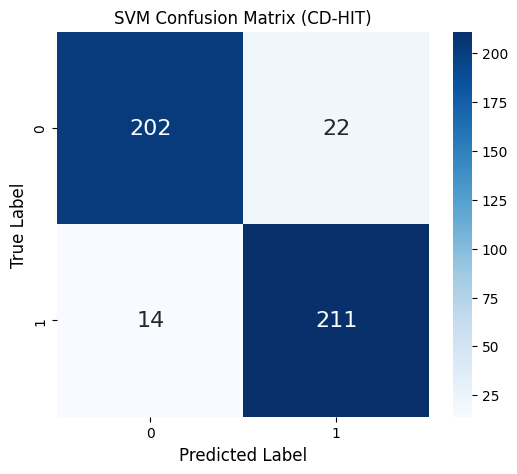

In [28]:
## Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred_svm)

# Plot the confusion matrix for the test set
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('SVM Confusion Matrix (CD-HIT)')
plt.show()

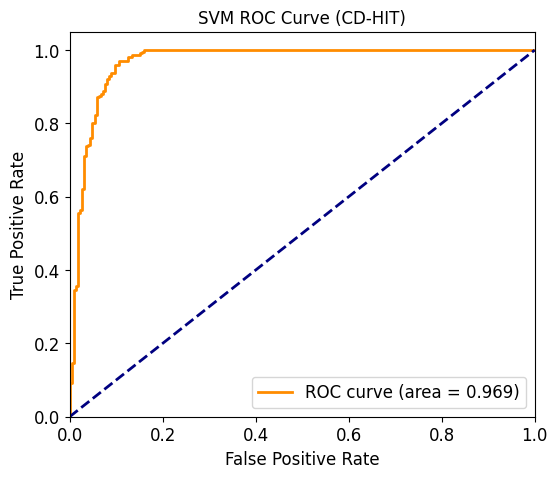

In [29]:
## ROC Curve and AUC
# Calculate predicted probabilities for the test set
y_test_pred_prob = model_svm.predict_proba(X_test)[:, 1]                        # Calculate the predicted probabilities for the test set
test_fpr_svm, test_tpr_svm, thresholds = roc_curve(y_test, y_test_pred_prob)    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the test set
test_roc_auc_svm = auc(test_fpr_svm, test_tpr_svm)                              # Calculate the area under the ROC curve (AUC) for the test set

# Plot the ROC curve for the test set
plt.figure(figsize=(6, 5))
plt.plot(test_fpr_svm, test_tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('SVM ROC Curve (CD-HIT)')
plt.legend(loc='lower right', fontsize=12)                  # Increase font size of legend
plt.tick_params(axis='both', which='major', labelsize=12)   # Increase font size of axis numbers
plt.show()

In [30]:
## Metrics
accuracy = accuracy_score(y_test, y_test_pred_svm)                  # Accuracy
precision = precision_score(y_test, y_test_pred_svm)                # Precision
recall = recall_score(y_test, y_test_pred_svm)                      # Recall / Sensitivity
f1 = f1_score(y_test, y_test_pred_svm)                              # F1-Score

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_svm).ravel()  # Obtain true positives, false positives, false negatives and true positives from confusion matrix
specificity = tn / (tn + fp)                                        # Specificity

print("SVM Test Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")

# Create a DataFrame
metrics_svm = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'SVM': [accuracy, precision, recall, specificity, f1]
}).round(2)

SVM Test Results:
Accuracy: 0.92
Precision: 0.91
Recall: 0.94
Specificity: 0.90
F1-Score: 0.92


### Validation Set

In [31]:
# Predict on the validation set
y_val_pred_svm = best_pipeline_svm.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)

print(f"Validation Set Accuracy: {val_accuracy_svm:.2f}")

Validation Set Accuracy: 0.91


# eXtreme Gradiant Boosting (XGBoost)

In [32]:
from xgboost import XGBClassifier

estimator = XGBClassifier(random_state=42)
print(estimator)

selector = SelectKBest(f_classif)
selector.fit(X, y)
X_new = selector.transform(X)

print(X.shape)
print(X_new.shape)

# Check what were the selected features:
selected_features = X.iloc[:, selector.get_support(indices=True)].columns.tolist()
print('Selected Features: %s' % selected_features)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
(2244, 25)
(2244, 10)
Selected Features: ['length', 'formulaC', 'formulaH', 'formulaN', 'formulaO', 'tot', 'hydrogen', 'single', 'double', 'MW_modlamp']


In [33]:
## Pipeline
# Define the pipeline
pipeline = Pipeline([('selector', selector), 
                     ('scaler', StandardScaler()), 
                     ('xgb', estimator)])

# Define the parameters to test
params_to_test = {'selector__k': [30, 25, 20, 15, 10, 5],
                  'xgb__n_estimators': [50, 100, 150],  
                  'xgb__max_depth': [3, 5, 7],          
                  'xgb__learning_rate': [0.01, 0.1, 0.3]} 

grid_search = GridSearchCV(pipeline, params_to_test, cv=3)  # Hyperparameter Optimization
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

gs_results = pd.DataFrame.from_dict(data=grid_search.cv_results_)
gs_results

Best parameters: {'selector__k': 20, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 100}
Best score: 0.9159162008183362


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.117426,0.077735,0.007001,0.000814,30,0.01,3,50,"{'selector__k': 30, 'xgb__learning_rate': 0.01...",0.875954,0.864245,0.881453,0.873884,0.007176,124
1,0.094196,0.006089,0.005423,0.000599,30,0.01,3,100,"{'selector__k': 30, 'xgb__learning_rate': 0.01...",0.875954,0.869981,0.879541,0.875159,0.003943,121
2,0.144337,0.008097,0.005671,0.000468,30,0.01,3,150,"{'selector__k': 30, 'xgb__learning_rate': 0.01...",0.883588,0.871893,0.875717,0.877066,0.004869,115
3,0.127152,0.023020,0.005769,0.000561,30,0.01,5,50,"{'selector__k': 30, 'xgb__learning_rate': 0.01...",0.900763,0.875717,0.883365,0.886615,0.010480,92
4,0.245372,0.007192,0.005620,0.000441,30,0.01,5,100,"{'selector__k': 30, 'xgb__learning_rate': 0.01...",0.904580,0.881453,0.885277,0.890437,0.010122,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.162470,0.021773,0.006573,0.000418,5,0.3,5,100,"{'selector__k': 5, 'xgb__learning_rate': 0.3, ...",0.860687,0.850860,0.862333,0.857960,0.005065,155
158,0.257039,0.030407,0.007000,0.000003,5,0.3,5,150,"{'selector__k': 5, 'xgb__learning_rate': 0.3, ...",0.849237,0.847036,0.868069,0.854781,0.009439,161
159,0.135051,0.017848,0.006430,0.000419,5,0.3,7,50,"{'selector__k': 5, 'xgb__learning_rate': 0.3, ...",0.856870,0.854685,0.864245,0.858600,0.004090,153
160,0.194000,0.011778,0.007001,0.000003,5,0.3,7,100,"{'selector__k': 5, 'xgb__learning_rate': 0.3, ...",0.853053,0.856597,0.866157,0.858602,0.005534,152


In [34]:
best_params_xgb = grid_search.best_params_      # Define best parameters
best_pipeline_xgb = grid_search.best_estimator_
best_pipeline_xgb

Pipeline(steps=[('selector', SelectKBest(k=20)), ('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [35]:
# Divide train dataset into 5 folds (cv=5). For each iteration, 1 fold will be used as validation set, remaining 4 folds will be used to train the model
cv_scores = cross_validate(best_pipeline_xgb, X_train, y_train, scoring=scoring_metrics, cv=5, return_train_score=False)

for key, value in cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metric: %s" % key)
        print("Results of each fold: %s" % value)            # Results of each fold
        print("Mean of all folds: %s" % np.mean(value))
        print("Standard Deviation: %s" % np.std(value), "\n")

# Recommended to save model evaluation results in files!

Metric: test_accuracy
Results of each fold: [0.92993631 0.92038217 0.89808917 0.93630573 0.9044586 ]
Mean of all folds: 0.9178343949044587
Standard Deviation: 0.014580284257655535 

Metric: test_precision
Results of each fold: [0.91176471 0.9005848  0.86516854 0.92215569 0.88304094]
Mean of all folds: 0.8965429329650204
Standard Deviation: 0.020350473122521622 

Metric: test_recall
Results of each fold: [0.95679012 0.95061728 0.95061728 0.95652174 0.9378882 ]
Mean of all folds: 0.9504869258492447
Standard Deviation: 0.006854358937397322 

Metric: test_f1
Results of each fold: [0.93373494 0.92492492 0.90588235 0.93902439 0.90963855]
Mean of all folds: 0.9226410324171814
Standard Deviation: 0.013012479670716667 



In [36]:
# Train the model on the complete dataset:
model_xgb = best_pipeline_xgb.fit(X_train, y_train)

y_test_pred_xgb = model_xgb.predict(X_test)

matrix = confusion_matrix(y_test, y_test_pred_xgb)
matrix

array([[198,  26],
       [  9, 216]], dtype=int64)

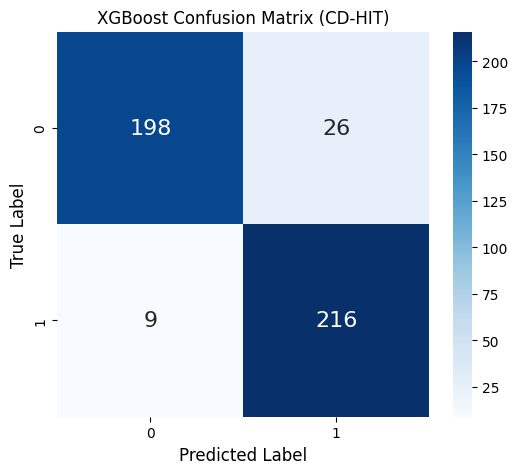

In [37]:
## Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred_xgb)

# Plot the confusion matrix for the test set
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('XGBoost Confusion Matrix (CD-HIT)')
plt.show()

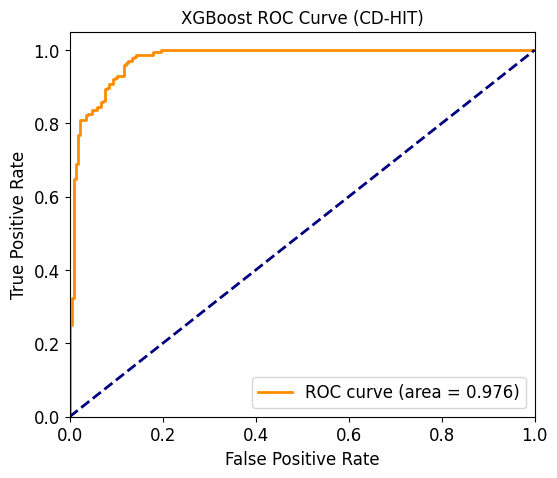

In [38]:
## ROC Curve and AUC
# Calculate predicted probabilities for the test set
y_test_pred_prob = model_xgb.predict_proba(X_test)[:, 1]                        # Calculate the predicted probabilities for the test set
test_fpr_xgb, test_tpr_xgb, thresholds = roc_curve(y_test, y_test_pred_prob)    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the test set
test_roc_auc_xgb = auc(test_fpr_xgb, test_tpr_xgb)                              # Calculate the area under the ROC curve (AUC) for the test set

# Plot the ROC curve for the test set
plt.figure(figsize=(6, 5))
plt.plot(test_fpr_xgb, test_tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('XGBoost ROC Curve (CD-HIT)')
plt.legend(loc='lower right', fontsize=12)                  # Increase font size of legend
plt.tick_params(axis='both', which='major', labelsize=12)   # Increase font size of axis numbers
plt.show()

In [39]:
## Metrics
accuracy = accuracy_score(y_test, y_test_pred_xgb)                  # Accuracy
precision = precision_score(y_test, y_test_pred_xgb)                # Precision
recall = recall_score(y_test, y_test_pred_xgb)                      # Recall / Sensitivity
f1 = f1_score(y_test, y_test_pred_xgb)                              # F1-Score

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb).ravel()  # Obtain true positives, false positives, false negatives and true positives from confusion matrix
specificity = tn / (tn + fp)                                        # Specificity

print("XGBoost Test Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")

# Create a DataFrame
metrics_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'XGBoost': [accuracy, precision, recall, specificity, f1]
}).round(2)

XGBoost Test Results:
Accuracy: 0.92
Precision: 0.89
Recall: 0.96
Specificity: 0.88
F1-Score: 0.93


### Validation Set

In [40]:
# Predict on the validation set
y_val_pred_xgb = best_pipeline_xgb.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)

print(f"Validation Set Accuracy: {val_accuracy_xgb:.2f}")

Validation Set Accuracy: 0.91


# Combined Plots

### Combined Metrics dataframe

In [41]:
# Rename the columns of each DataFrame
metrics_dt.columns = ['Metric', 'Decision Tree']
metrics_rf.columns = ['Metric', 'Random Forest']
metrics_svm.columns = ['Metric', 'SVM']
metrics_xgb.columns = ['Metric', 'XGBoost']

# Concatenate all DataFrames into a single DataFrame
combined_metrics = pd.concat([metrics_dt.set_index('Metric'), 
                              metrics_rf.set_index('Metric'), 
                              metrics_svm.set_index('Metric'), 
                              metrics_xgb.set_index('Metric')], axis=1)

combined_metrics

,Decision Tree,Random Forest,SVM,XGBoost
Metric,,,,
Accuracy,0.88,0.93,0.92,0.92
Precision,0.85,0.90,0.91,0.89
Recall,0.91,0.97,0.94,0.96
Specificity,0.84,0.90,0.90,0.88
F1 Score,0.88,0.94,0.92,0.93


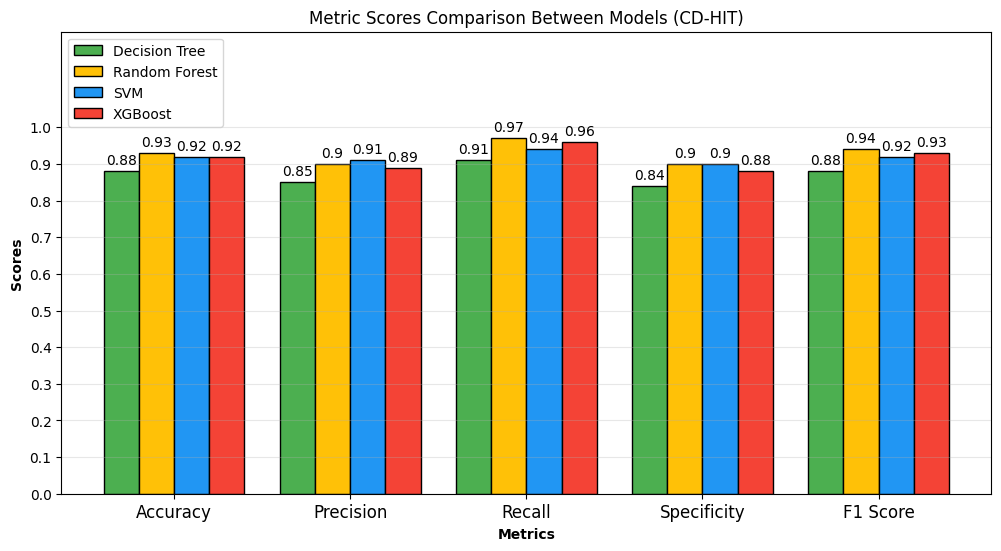

In [42]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Define the list of models from the columns
models = combined_metrics.columns.tolist()
num_models = len(models)

# Set the positions of the bars on the x-axis
r = [np.arange(len(combined_metrics.index))]            # Start positions for the first group
for i in range(1, num_models):
    r.append([x + 0.2 for x in r[i - 1]])               # Positions for subsequent groups

colors = ['#4CAF50', '#FFC107', '#2196F3', '#F44336']   # Colors of each bar

# Plot each model's metrics
for i, model in enumerate(models):
    bars = plt.bar(r[i], combined_metrics[model], color=colors[i], width=0.2, edgecolor='black', label=model)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, round(yval, 2), va='bottom', ha='center')

plt.title('Metric Scores Comparison Between Models (CD-HIT)')
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + 0.2 * (num_models - 1) / 2 for r in range(len(combined_metrics.index))], combined_metrics.index, fontsize=12)
plt.ylim(top=combined_metrics.values.max() * 1.3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y', alpha=0.3)
plt.legend(loc='upper left')
plt.show()

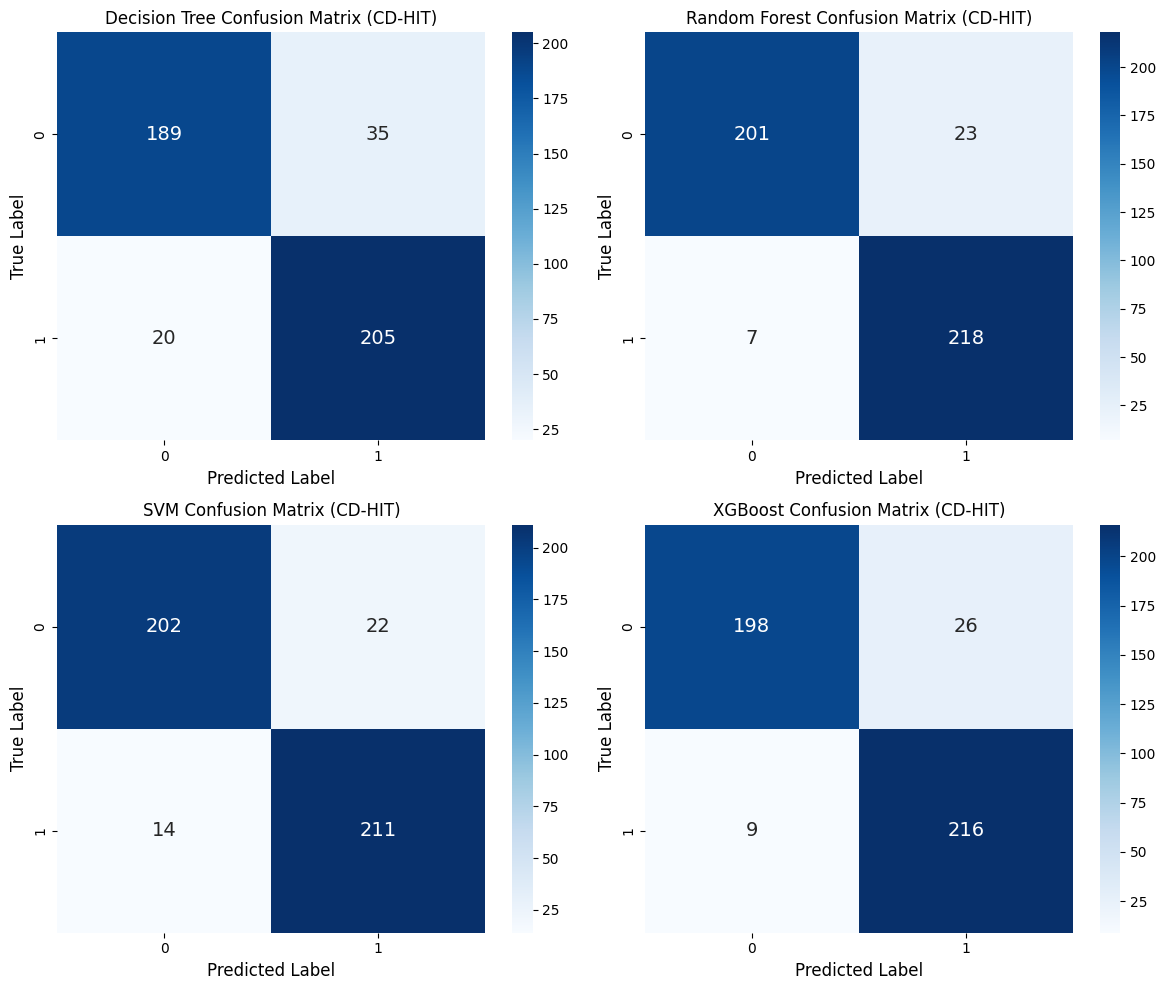

In [43]:
# Define the confusion matrices for all four models
confusion_matrices = {
    'Decision Tree': confusion_matrix(y_test, y_test_pred_dt),
    'Random Forest': confusion_matrix(y_test, y_test_pred_rf),
    'SVM': confusion_matrix(y_test, y_test_pred_svm),
    'XGBoost': confusion_matrix(y_test, y_test_pred_xgb)
}

# Plot the confusion matrices in a grid-like pattern
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (model, matrix) in zip(axes.flatten(), confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, ax=ax)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title(f'{model} Confusion Matrix (CD-HIT)', fontsize=12)

plt.tight_layout()
plt.show()

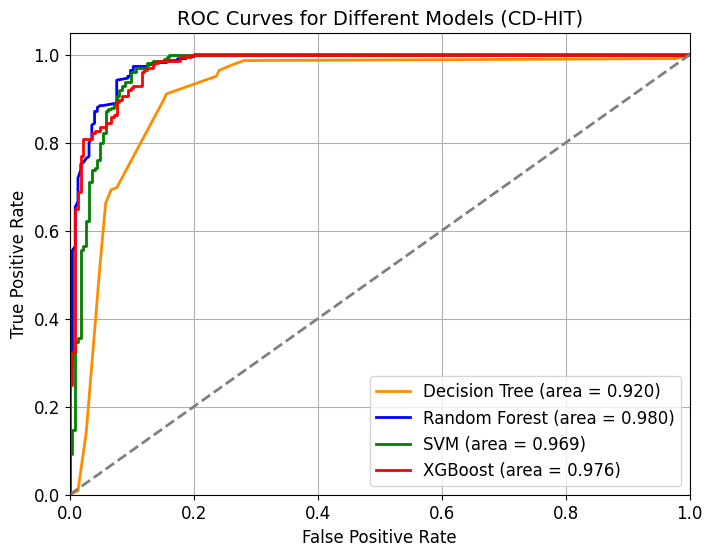

In [44]:
# Plot combined ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(test_fpr_dt, test_tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (area = {test_roc_auc_dt:.3f})') # Plot ROC curve for Decision Tree
plt.plot(test_fpr_rf, test_tpr_rf, color='blue', lw=2, label=f'Random Forest (area = {test_roc_auc_rf:.3f})')       # Plot ROC curve for Random Forest
plt.plot(test_fpr_svm, test_tpr_svm, color='green', lw=2, label=f'SVM (area = {test_roc_auc_svm:.3f})')             # Plot ROC curve for SVM
plt.plot(test_fpr_xgb, test_tpr_xgb, color='red', lw=2, label=f'XGBoost (area = {test_roc_auc_xgb:.3f})')           # Plot ROC curve for XGBoost

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Different Models (CD-HIT)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

### Combined Validation Set Accuracy

In [45]:
print(f"DT Validation Set Accuracy:\t {val_accuracy_dt:.2f}")
print(f"RF Validation Set Accuracy:\t {val_accuracy_rf:.2f}")
print(f"SVM Validation Set Accuracy:\t {val_accuracy_svm:.2f}")
print(f"XGB Validation Set Accuracy:\t {val_accuracy_xgb:.2f}")

DT Validation Set Accuracy:	 0.84
RF Validation Set Accuracy:	 0.89
SVM Validation Set Accuracy:	 0.91
XGB Validation Set Accuracy:	 0.91
